In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Files formats

In [6]:
sample_submission_df = pd.read_csv('novozymes-data/sample_submission.csv')
test_df = pd.read_csv('novozymes-data/test.csv')
train_df = pd.read_csv('novozymes-data/train.csv')

print("=============== Sample Submission ================")
print(sample_submission_df.head())
print()
print("=============== Test ================")
print(test_df.head())
print()
print("=============== Train ================")
print(train_df.head())


=============== Sample Submission ================
   seq_id  tm
0   31390   0
1   31391   1
2   31392   2
3   31393   3
4   31394   4

=============== Test ================
   seq_id                                   protein_sequence  pH data_source
0   31390  VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   Novozymes
1   31391  VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   Novozymes
2   31392  VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...   8   Novozymes
3   31393  VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   Novozymes
4   31394  VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...   8   Novozymes

=============== Train ================
   seq_id                                   protein_sequence   pH  \
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3       3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRA

## Duplicates and missing data

In [37]:
print("========================= Training data =======================")
for col in train_df.columns:
    print(f"NaN values for {col} --> {train_df[col].isna().sum()}")
print()

print("========================= Test data =======================")
for col in test_df.columns:
    print(f"NaN values for {col} --> {test_df[col].isna().sum()}")


========================= Training data =======================
NaN values for seq_id --> 0
NaN values for protein_sequence --> 0
NaN values for pH --> 286
NaN values for data_source --> 3347
NaN values for tm --> 0

========================= Test data =======================
NaN values for seq_id --> 0
NaN values for protein_sequence --> 0
NaN values for pH --> 0
NaN values for data_source --> 0


In [39]:
print("========================= Training data =======================")
for col in train_df.columns:
    print(f"Unique values for {col} --> {len(train_df[col].unique())}")
print()

print("========================= Test data =======================")
for col in test_df.columns:
    print(f"Unique values for {col} --> {len(test_df[col].unique())}")

========================= Training data =======================
Unique values for seq_id --> 31390
Unique values for protein_sequence --> 28981
Unique values for pH --> 116
Unique values for data_source --> 325
Unique values for tm --> 770

========================= Test data =======================
Unique values for seq_id --> 2413
Unique values for protein_sequence --> 2413
Unique values for pH --> 1
Unique values for data_source --> 1


## pH and melting temperature

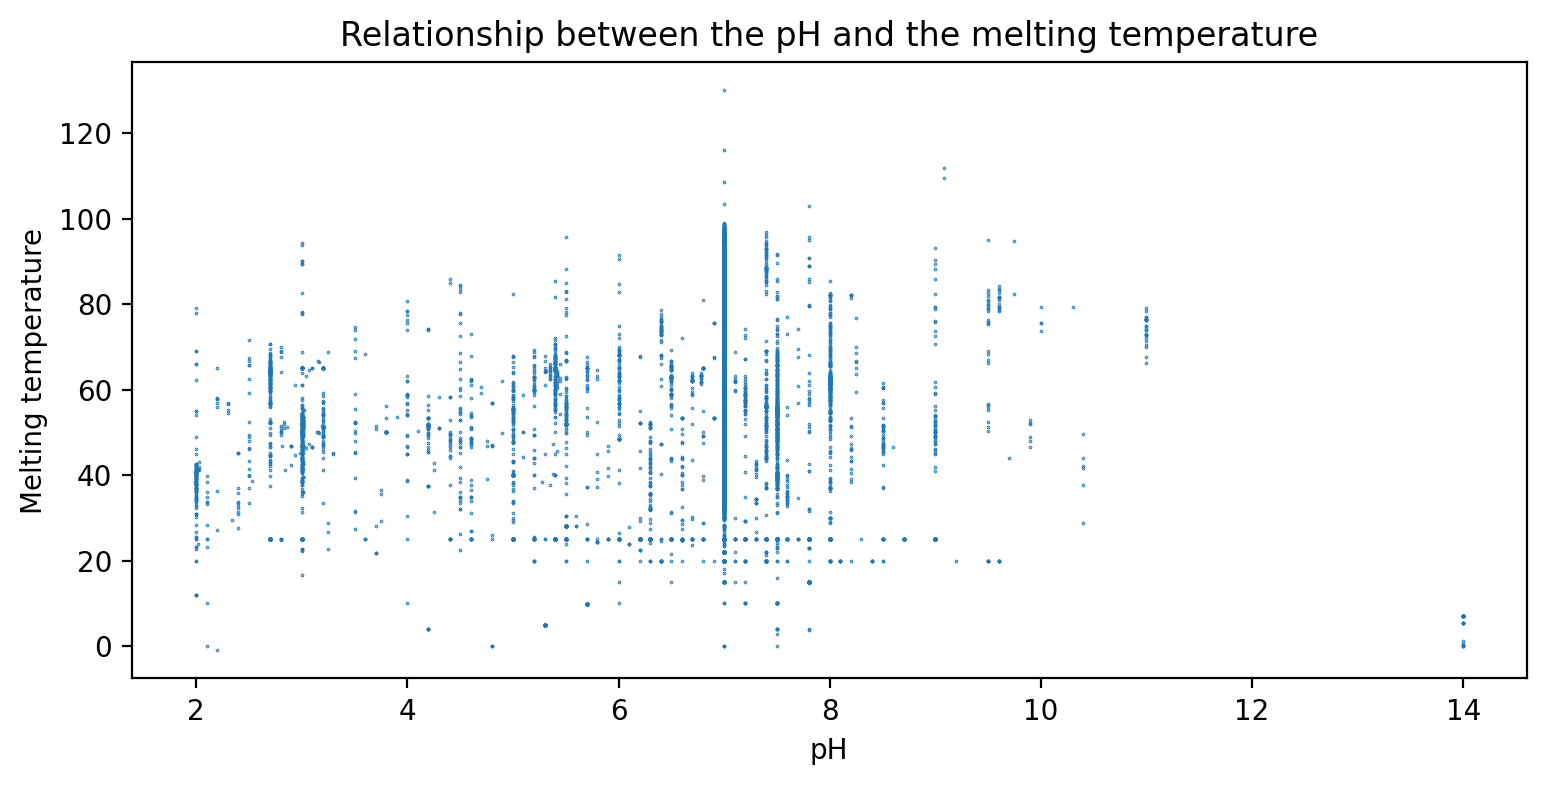

In [12]:
plt.figure(figsize=(9,4), dpi= 200)
plt.scatter(np.clip(train_df["pH"],0,14), train_df["tm"], s=0.1)
plt.title("Relationship between the pH and the melting temperature")
plt.xlabel("pH")
plt.ylabel("Melting temperature")
plt.show()

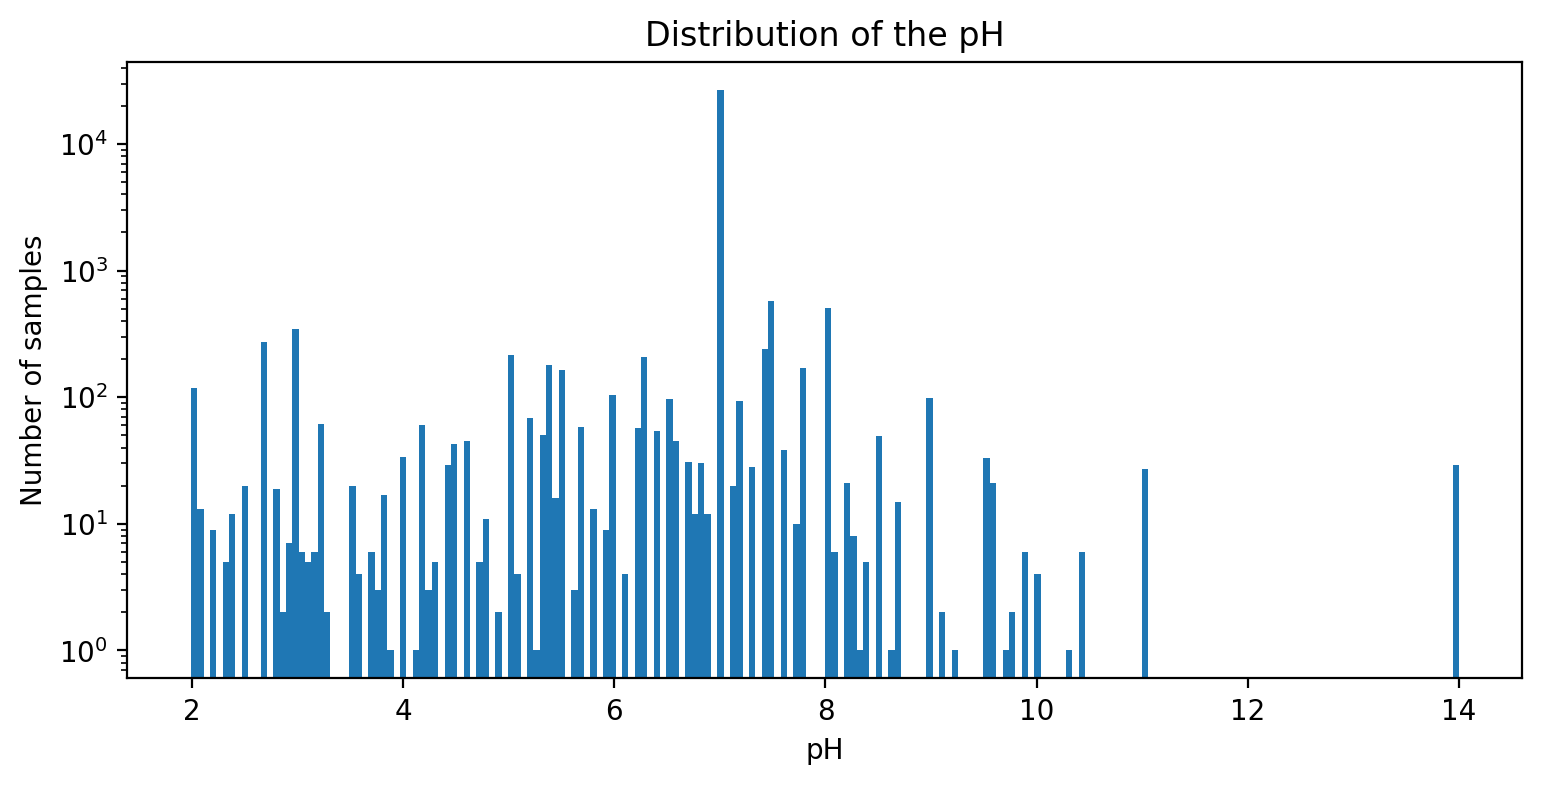

In [16]:
plt.figure(figsize=(9,4), dpi= 200)
plt.hist(np.clip(train_df["pH"],0,14), bins=200)
plt.title("Distribution of the pH")
plt.xlabel("pH")
plt.ylabel("Number of samples")
plt.yscale('log')
plt.show()

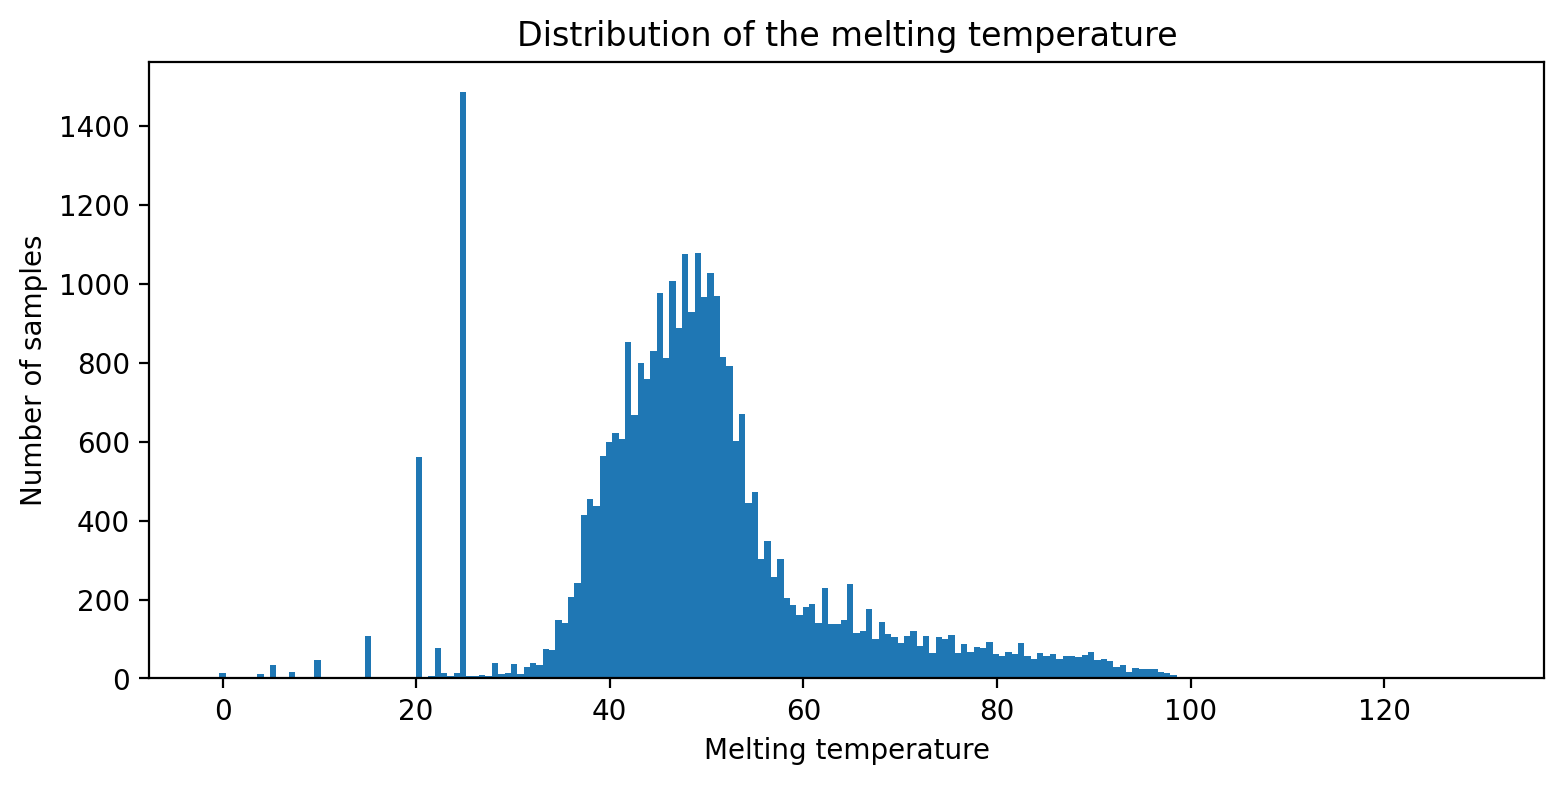

In [17]:
plt.figure(figsize=(9,4), dpi= 200)
plt.hist(train_df["tm"], bins=200)
plt.title("Distribution of the melting temperature")
plt.xlabel("Melting temperature")
plt.ylabel("Number of samples")
plt.show()